### Page no 700 to 800 P Kindur, regarding small signal  stability analysis

#### code credits S.Naresh Ram, Sr.Engineer


![title](Blockdiagram.PNG)

![title](statematrixfield.PNG)

### K1=Synchronizing Coeffcient , depends on operating load angle
### K3 & T3=almost constant, depends on system parameter
### K4= demagnetising , depends on operating load angle
### K2= relation between voltage and flux, depends on Eqo and Iq0

![title](Problem1.PNG)

In [39]:


import numpy as np
import pandas as pd
from sympy import sin,cos,nsolve,Symbol,tan,cot
from numpy import exp, abs, angle

def polar2z(r,theta):
    return r * exp( 1j * theta )

def z2polar(z):
    return ( abs(z), angle(z) )

#Given values
Xd,X_d,Xq,X_q=complex(0,1.81),complex(0,0.3),complex(0,1.76),0
X_line=complex(0,0.65)
Xl,Ra,T_do,H=complex(0,0.16),0.003,8,3.5
Vref=complex(0.995,0)
Vt=complex(0.809,0.5877)
P,Q=0.9,0.3 #overexcited
L=0.16
Ladu,Laqu=1.65,1.60
#Initial values
Ksd,Ksq=0.8491,0.8491
#deltai=43.13
#ed0=0.6836
#eq0=0.7298
#id0=0.8342
#iq0=0.4518
delta0=79.13
#Efd0=2.395
Ksd_incr,Ksq_incr=0.434,0.434


In [40]:
Phi=np.angle(complex(P,Q))*180/3.14
print('\n Phi',Phi)
I=np.conjugate(np.divide(complex(P,Q),Vt))
Xds=Ksd*Ladu+L
Xqs=Ksq*Laqu+L
Z=complex(Ra,Xqs)
print('\n compleximpedance\n',Z)
E=Vt+I*Z
print('\n current flowing in the line\n ',I)
print('internal machine voltage',E)
load_angle=np.angle(E)*180/3.14
print('\n loadangle',load_angle)



 Phi 18.4442992966228

 compleximpedance
 (0.003+1.51856j)

 current flowing in the line
  (0.9045255169537701+0.2862665591022629j)
internal machine voltage (0.377000630560529+1.962135068702624j)

 loadangle 79.16398409330476


In [41]:
K1,K2,K3,K4=0.7643,0.8649,0.3230,1.4187
T3=2.365
KD=2

In [42]:
A=np.array([[-KD/(2*H),-K1/(2*H),-K2/(2*H)],[2*3.14*60,0,0],[0,-K3*K4/T3,-1/T3]])
print('\n State_Matrix A\n',A)


 State_Matrix A
 [[-2.85714286e-01 -1.09185714e-01 -1.23557143e-01]
 [ 3.76800000e+02  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.93759027e-01 -4.22832981e-01]]


In [43]:
w,V=np.linalg.eig(A)
print('\n Eigen values\n',w)
print('\n Right eigen vector\n',V)
L=np.linalg.inv(V)
print('\n Left eigen vector\n',L)
p=np.array([[L[:][0]*V[:][0]],[L[:][1]*V[:][0]],[L[:][2]*V[:][2]]])
print('\n participation factor\n',p)


 Eigen values
 [-0.2525329 +6.41057269j -0.2525329 -6.41057269j -0.20348146+0.j        ]

 Right eigen vector
 [[-6.69801402e-04+0.01700297j -6.69801402e-04-0.01700297j
   4.04735672e-04+0.j        ]
 [ 9.99399142e-01+0.j          9.99399142e-01-0.j
  -7.49475668e-01+0.j        ]
 [-8.01891701e-04+0.03018545j -8.01891701e-04-0.03018545j
   6.62031766e-01+0.j        ]]

 Left eigen vector
 [[-1.00615177e+00-2.93989204e+01j  5.00081027e-01-1.97067565e-02j
   5.66748918e-01-4.33656333e-03j]
 [-1.00615177e+00+2.93989204e+01j  5.00081027e-01+1.97067565e-02j
   5.66748918e-01+4.33656333e-03j]
 [-2.68333520e+00+1.24905083e-17j -5.85611046e-04+2.72592839e-21j
   1.51147904e+00-9.14023852e-18j]]

 participation factor
 [[[ 5.00543021e-01+2.58386504e-03j -6.70028454e-04-8.48966541e-03j
    2.29383504e-04-1.75516187e-06j]]

 [[-4.99195177e-01-3.67990112e-02j  1.18508840e-07-8.51606463e-03j
    2.29383504e-04+1.75516187e-06j]]

 [[ 2.15174423e-03-8.09976898e-02j  4.69596638e-07+1.76769350e-05j
  


 initial value [[0.  ]
 [0.09]
 [0.  ]]

 C 
 [[ 4.50072924e-02-1.77360809e-03j]
 [ 4.50072924e-02+1.77360809e-03j]
 [-5.27049941e-05+2.45333555e-22j]]

 K values
 (0.04498024944467663-0.0017725424023342412j)

 time response of load angle deviation



C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


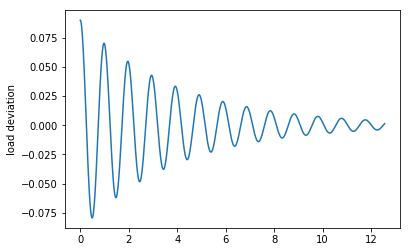

In [44]:
initial_value=np.matrix([[0.],
               [0.09],
               [0]])
print('\n initial value',initial_value)
C=L*initial_value
print('\n C \n',C)
t = np.arange(0,4*np.pi,0.01)
K=np.array([C[0]*V[1][0],C[1]*V[1][1],C[2]*V[1][2]])
Y=K.flatten()
print('\n K values\n',Y[0])

import matplotlib.pyplot as plt
print('\n time response of load angle deviation\n')
plt.plot(t,Y[0]*np.exp(w[0]*t)+Y[1]*np.exp(w[1]*t)+Y[2]*np.exp(w[2]*t))
plt.ylabel('load deviation')
plt.show()

# field dynamics removed

In [45]:
# state matrix

In [46]:
A=np.array([[-KD/(2*H),-K1/(2*H)],[2*3.14*60,0]])
print('\n State_Matrix A\n',A)


 State_Matrix A
 [[-2.85714286e-01 -1.09185714e-01]
 [ 3.76800000e+02  0.00000000e+00]]


In [47]:
w,V=np.linalg.eig(A)
print('\n Eigen values\n',w)
print('\n Right eigen vector\n',V)
L=np.linalg.inv(V)
print('\n Left eigen vector\n',L)
p=np.array([[L[:][0]*V[:][0]],[L[:][1]*V[:][0]]])
print('\n participation factor\n',p)


 Eigen values
 [-0.14285714+6.41254778j -0.14285714-6.41254778j]

 Right eigen vector
 [[-3.79077626e-04+0.01701597j -3.79077626e-04-0.01701597j]
 [ 9.99855146e-01+0.j          9.99855146e-01-0.j        ]]

 Left eigen vector
 [[0.        -2.93841545e+01j 0.50007244-1.11404893e-02j]
 [0.        +2.93841545e+01j 0.50007244+1.11404893e-02j]]

 participation factor
 [[[ 5.00000000e-01+0.01113888j -3.79132545e-04-0.008505j  ]]

 [[-5.00000000e-01-0.01113888j  0.00000000e+00-0.00851344j]]]



 initial value [[0.  ]
 [0.09]]

 C 
 [[0.04500652-0.00100264j]
 [0.04500652+0.00100264j]]

 K values
 (0.045-0.0010024987965973292j)

 time response of load angle deviation



C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


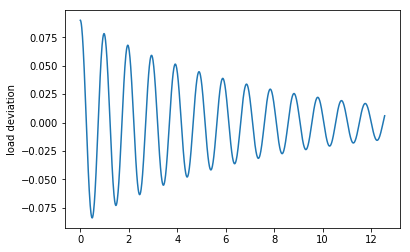

In [48]:
initial_value=np.matrix([[0.],
               [0.09]])
print('\n initial value',initial_value)
C=L*initial_value
print('\n C \n',C)
t = np.arange(0,4*np.pi,0.01)
K=np.array([C[0]*V[1][0],C[1]*V[1][1]])
Y=K.flatten()
print('\n K values\n',Y[0])

import matplotlib.pyplot as plt
print('\n time response of load angle deviation\n')
plt.plot(t,Y[0]*np.exp(w[0]*t)+Y[1]*np.exp(w[1]*t))
plt.ylabel('load deviation')
plt.show()

![title!](AVR1.jpg)

# with AVR

In [49]:
K1,K2,K3,K4=0.7643,0.8649,0.3230,1.4187
T3=2.365
KD=2
KA=200
TR=0.02
K5,K6=-0.1463,0.4168


 State_Matrix A
 [[-2.85714286e-01 -1.09185714e-01 -1.23557143e-01  0.00000000e+00]
 [ 3.76800000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.93759027e-01 -4.22832981e-01 -2.73150106e+01]
 [ 0.00000000e+00 -7.31500000e+00  2.08400000e+01 -5.00000000e+01]]

 Eigen values
 [  0.36907426+7.23527384j   0.36907426-7.23527384j
 -31.22485294+0.j         -20.22184284+0.j        ]

 Right eigen vector
 [[ 9.39198586e-04+0.0184119j  9.39198586e-04-0.0184119j
   2.53982720e-03+0.j        -4.53544931e-03+0.j       ]
 [ 9.58858607e-01+0.j         9.58858607e-01-0.j
  -3.06488838e-02+0.j         8.45104630e-02+0.j       ]
 [ 2.25859165e-01-0.1525712j  2.25859165e-01+0.1525712j
   6.63065560e-01+0.j        -8.06482195e-01+0.j       ]
 [-5.37631648e-02-0.0554029j -5.37631648e-02+0.0554029j
   7.47929314e-01+0.j        -5.85169958e-01+0.j       ]]

 Left eigen vector
 [[  0.60813347-2.56600566e+01j   0.49377849-3.29137444e-02j
    0.09849996+2.20354224e-01j  -0.06915456-1

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


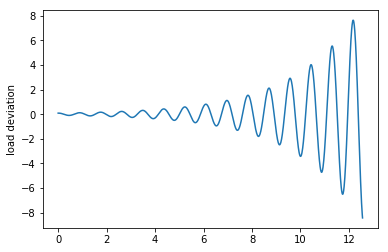

In [50]:
A=np.array([[-KD/(2*H),-K1/(2*H),-K2/(2*H),0],[2*3.14*60,0,0,0],[0,-K3*K4/T3,-1/T3,-K3*KA/T3],[0,K5/TR,K6/TR,-1/TR]])
print('\n State_Matrix A\n',A)
w,V=np.linalg.eig(A)
print('\n Eigen values\n',w)
print('\n Right eigen vector\n',V)
L=np.linalg.inv(V)
print('\n Left eigen vector\n',L)
p=np.array([[L[:][0]*V[:][0]],[L[:][1]*V[:][0]]])
print('\n participation factor\n',p)
initial_value=np.matrix([[0.0],
               [0.09],[0],[0]])
print('\n initial value',initial_value)
C=L*initial_value
print('\n C \n',C)
t = np.arange(0,4*np.pi,0.01)
K=np.array([C[0]*V[1][0],C[1]*V[1][1]])
Y=K.flatten()
print('\n K values\n',Y[0])

import matplotlib.pyplot as plt
print('\n time response of load angle deviation\n')
plt.plot(t,Y[0]*np.exp(w[0]*t)+Y[1]*np.exp(w[1]*t))
plt.ylabel('load deviation')
plt.show()

# result is shocked!, yes AVR damps first few cycles and possible to have negative damping in remaing cycles

# its the time to PSS now

In [51]:
K1,K2,K3,K4=0.7643,0.8649,0.3230,1.4187
T3=2.365
KD=2
KA=200
TR=0.02
K5,K6=-0.1463,0.4168
KSTAB=9.5
TW=1.4
T1,T2=0.154,0.033


 State_Matrix A
 [[-2.85714286e-01 -1.09185714e-01 -1.23557143e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.76800000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.93759027e-01 -4.22832981e-01 -2.73150106e+01
   0.00000000e+00  2.73150106e+01]
 [ 0.00000000e+00 -7.31500000e+00  2.08400000e+01 -5.00000000e+01
   0.00000000e+00  0.00000000e+00]
 [-2.71428571e+00 -1.03726429e+00 -1.17379286e+00  0.00000000e+00
  -7.14285714e-01  0.00000000e+00]
 [-1.26666667e+01 -4.84056667e+00 -5.47770000e+00  0.00000000e+00
   2.69696970e+01 -3.03030303e+01]]

 Eigen values
 [-39.11517705 +0.j          -1.12325708 +6.56814561j
  -1.12325708 -6.56814561j  -0.73890044 +0.j
 -19.81263582+12.90040806j -19.81263582-12.90040806j]

 Right eigen vector
 [[ 0.00138374+0.j         -0.00273283+0.01597995j -0.00273283-0.01597995j
  -0.0012068 +0.j         -0.00364177-0.00207396j -0.00364177+0.00207396j]
 [-0.01332969+0.j          0.9167345

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


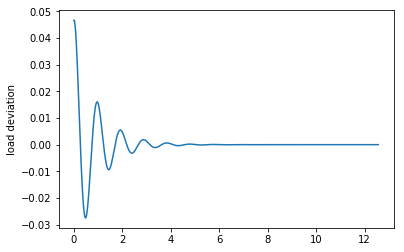

In [52]:
A=np.array([[-KD/(2*H),-K1/(2*H),-K2/(2*H),0,0,0],[2*3.14*60,0,0,0,0,0],[0,-K3*K4/T3,-1/T3,-K3*KA/T3,0,K3*KA/T3],
            [0,K5/TR,K6/TR,-1/TR,0,0],[-(KD*KSTAB)/(2*H),KSTAB*(-K1/(2*H)),KSTAB*(-K2/(2*H)),0,-1/TW,0],
[(-T1/T2)*((KD*KSTAB)/(2*H)),(-T1/T2)*(KSTAB*(K1/(2*H))),(T1/T2)*(KSTAB*(-K2/(2*H))),0,(T1/T2)*(-1/TW)+(1/T2),-1/T2]])
print('\n State_Matrix A\n',A)
w,V=np.linalg.eig(A)
print('\n Eigen values\n',w)
print('\n Right eigen vector\n',V)
L=np.linalg.inv(V)
print('\n Left eigen vector\n',L)
p=np.array([[L[:][0]*V[:][0]],[L[:][1]*V[:][0]]])
print('\n participation factor\n',p)
initial_value=np.matrix([[0.0],
               [0.09],[0],[0],[0],[0]])
print('\n initial value',initial_value)
C=L*initial_value
print('\n C \n',C)
t = np.arange(0,4*np.pi,0.01)
K=np.array([C[0]*V[1][0],C[1]*V[1][1]])
Y=K.flatten()
print('\n K values\n',Y[0])

import matplotlib.pyplot as plt
print('\n time response of load angle deviation\n')
plt.plot(t,Y[0]*np.exp(w[0]*t)+Y[1]*np.exp(w[1]*t))
plt.ylabel('load deviation')
plt.show()